In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
import geopandas as gpd
import helper_400

%load_ext autoreload
%autoreload 2
helper_400.set_sns_style()

<Figure size 800x600 with 0 Axes>

In [2]:
gdf = gpd.read_file("outputs/d2-events-2d-230929_SVI_shapefile.geojson")

In [7]:
gdf = gdf[gdf['ST_ABBR'] != 'TX']
len(gdf)

18106

In [8]:
data = gdf

In [9]:
data["E_WHITE"] = data["E_TOTPOP"] - data[
    ["E_AFAM", "E_HISP", "E_ASIAN", "E_AIAN", "E_NHPI", "E_TWOMORE", "E_OTHERRACE"]
].sum(axis=1)

In [10]:
len(data[data["_hws"] != 0])

18106

In [11]:
temp = data[["E_WHITE", "E_AIAN", "E_TOTPOP"]].sum(axis=0)
temp

E_WHITE     37742376
E_AIAN        871248
E_TOTPOP    75506421
dtype: int64

In [10]:
37742725/75508221*100

49.98492150940756

In [11]:
871248/75508221*100

1.1538452217010913

In [12]:
# normalize demographic variables by each groups' total population
demographic_cols = [
    "E_AFAM",
    "E_HISP",
    "E_ASIAN",
    "E_AIAN",
    "E_NHPI",
    "E_TWOMORE",
    "E_OTHERRACE",
    "E_WHITE",
    "E_TOTPOP",
]

for dc in demographic_cols:
    data[dc + "_normalized"] = data[dc] * 100 / data[dc].sum()

data = data.rename(
    columns={
        "E_WHITE_normalized": "White",
        "E_AFAM_normalized": "Black",
        "E_HISP_normalized": "Hispanic",
        "E_ASIAN_normalized": "Asian",
        "E_AIAN_normalized": "American Indian or \nAlaska Native",
    }
)

cats = ["White", "Black", "Hispanic", "Asian", "American Indian or \nAlaska Native"]

In [13]:
total_cols = [
    "E_WHITE",
    "E_AFAM",
    "E_HISP",
    "E_ASIAN",
    "E_AIAN",
]
total_cols_labels = ["White", "Black", "Hispanic", "Asian", "American Indian or \nAlaska Native"]

In [15]:
import plotting

hspts = plotting.get_hotspot_list()

In [16]:
hspts_mini = ["wfday", "heatday", "smoke_pm_non_zero", "hw", "hs", "hws", "ws"]

In [21]:
df = data

In [70]:
def get_xlabel(hspt, index):
    if hspt in [
        "wfday",
        "wfday_2d",
        "hw",
        "hws",
        "ws",
        "hws5",
        "ws5",
        "hws_2d",
        "ws_2d",
    ]:
        return f"{index} Exposure Days"
    else:
        return f"{index}"

## Pie plots normalized per demographic population

In [9]:
import matplotlib.patches as mpatches

In [10]:
plt.rcParams["font.family"] = "Times New Roman"

In [23]:
options = {
        "wfday": "Wildfire Burn Zone",
        "heatday": "Extreme Heat",
        "smoke_pm_non_zero": "Wildfire Smoke",
        "smoke_pm_gt_five": "Wildfire Smoke (over 5 μg/m\u00b3)",
        "hw": "Extreme Heat-Wildfire Burn Zone",
        "hs": "Extreme Heat-Wildfire Smoke",
        "hws": "Extreme Heat-Wildfire Burn Zone-Wildfire Smoke",
        "_hws": "Extreme Heat or Wildfire Burn Zone or Wildfire Smoke",
        "ws": "Wildfire Burn Zone-Wildfire Smoke",
        "hs5": "Extreme Heat-Wildfire Smoke (over 5 μg/m\u00b3)",
        "hws5": "Extreme Heat-Wildfire Burn Zone-Wildfire Smoke (over 5 μg/m\u00b3)",
        "ws5": "Wildfire Burn Zone-Wildfire Smoke (over 5 μg/m\u00b3)",
    }

In [56]:
plt.rcParams["font.family"] = "Times New Roman"

In [18]:
def get_cut_vars2(hspt, col):
    """Returns the cut variables for a given hotspot"""

    if "_hws" in hspt:
        return pd.qcut(col, 5, labels=["I", "II", "III", "IV", "V"], retbins=True, duplicates="drop")
    if hspt in [
        "hw",
        "hws",
        "ws",
        "wfday",
    ]:  # ["hw", "hws", "ws", "hws5", "ws5", "hws_2d", "ws_2d"]:
        return pd.cut(
            col,
            bins=pd.IntervalIndex.from_tuples(
                [(0, 1), (1, 10), (10, 20), (20, 30), (30, 1000)], closed="left"
            ),
            retbins=True,
        )
    # if "wfday" in hspt:
    #     return pd.cut(
    #         col,
    #         bins=pd.IntervalIndex.from_tuples(
    #             [(0, 1), (1, 10), (10, 50), (50, 100), (100, 1000)], closed="left"
    #         ),
    #     )
    return pd.qcut(
        col, 5, retbins=True, labels=["I", "II", "III", "IV", "V"], duplicates="drop"
    ) 

In [19]:
def get_labels(boundaries):
    # Define the boundaries
    boundaries = np.round(boundaries).astype(int)
    # Define custom labels
    labels = ['I', 'II', 'III', 'IV', 'V']

    # Initialize an empty list to hold the formatted interval strings
    formatted_intervals = []

    # Loop through the boundaries to create and format intervals
    for i in range(1, len(boundaries)):
        # For the first interval, use square brackets on both ends
        if i == 1:
            interval_str = f'{labels[i-1]} [{boundaries[i-1]}, {boundaries[i]}]'
        # For subsequent intervals, use a parenthesis on the left and a square bracket on the right
        else:
            interval_str = f'{labels[i-1]} ({boundaries[i-1]}, {boundaries[i]}]'
        
        # Append the formatted string to the list
        formatted_intervals.append(interval_str)

    # Display the results
    return formatted_intervals

/var/folders/lc/q1l1y0k176b0h_m5yz0s_r5w0000gn/T/ipykernel_13833/2114757727.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  normalized_df = df.groupby("exposure_category")[cats].sum()
/var/folders/lc/q1l1y0k176b0h_m5yz0s_r5w0000gn/T/ipykernel_13833/2114757727.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  normalized_df = df.groupby("exposure_category")[cats].sum()
/var/folders/lc/q1l1y0k176b0h_m5yz0s_r5w0000gn/T/ipykernel_13833/2114757727.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_yticklabels(labe

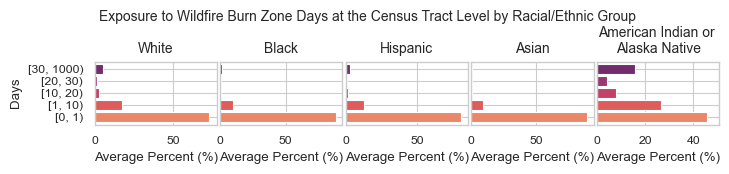

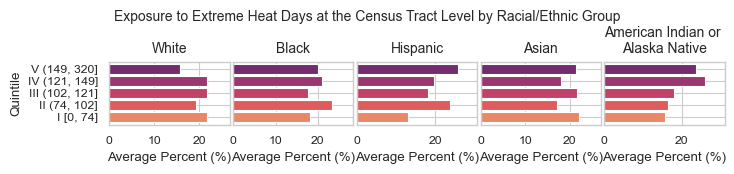

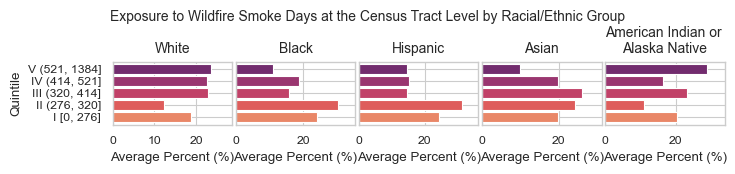

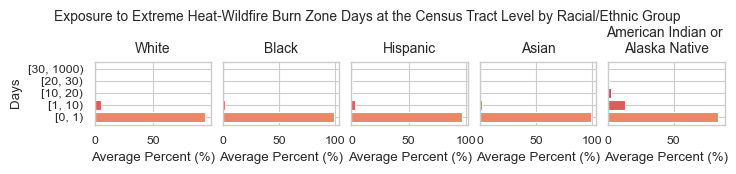

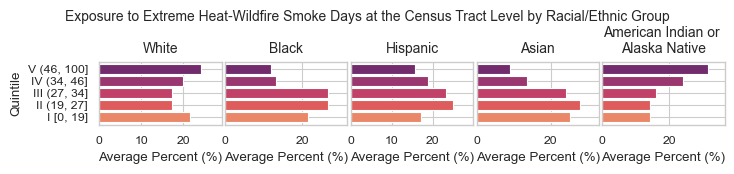

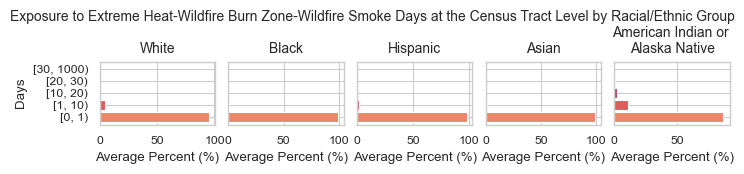

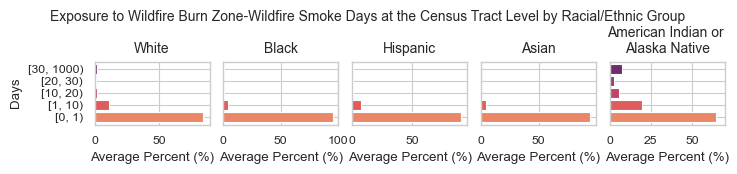

In [25]:
for hspt in hspts_mini:
    df["exposure_category"], bins = get_cut_vars2(hspt, df[hspt])
    
    normalized_df = df.groupby("exposure_category")[cats].sum()
    normalized_df = normalized_df.transpose()
    colors = sns.color_palette("flare", n_colors=normalized_df.shape[0])

    fig, axs = plt.subplots(1, 5, figsize=(7.2, 1.6), sharey=True)  # 1 row, 5 columns of subplots
    #fig, axs = plt.subplots(1, 6, figsize=(12, 4), sharey=True)  # 1 row, 6 columns of subplots
    labels = ""

    for i, (index, row) in enumerate(normalized_df.iterrows()):
        xlabel = f"{index}"
        labels = [str(label) for label in row.index]
        axs[i].barh(labels, row, color=colors)
        axs[i].set_title(xlabel, fontsize=10)
        # axs[i].set_xlim(0, 100)
        # if i > 0:  # Hide y-axis labels for all but the first subplot
        #     #axs[i].set_yticklabels([])
        #     axs[i].set_ylabel([])
        if i == 0:
            if "III" in labels:
                labels = get_labels(bins)
                axs[i].set_yticklabels(labels, rotation=0)
                axs[i].set_ylabel("Quintile")
            else:
                axs[i].set_ylabel("Days")
        # rotate x-axis labels and use integers
        # Ensure y-axis starts at 0 and ends slightly above the highest number for visual clarity
        axs[i].set_xlim(0, max(row) + 5)
        axs[i].set_xlabel("Average Percent (%)") 

        # Formatting x-ticks to avoid decimals and rotate for readability
        #axs[i].set_xticklabels(axs[i].get_xticks(), rotation=90)
        # Adjusting tick parameters to ensure no decimal points
        #axs[i].set_xticklabels([f'{int(tick)}' for tick in axs[i].get_xticks()])


    # Add a legend outside of the last subplot
    #legend_handles = [mpatches.Patch(color=color, label=label) for color, label in zip(colors, labels)]
    #fig.legend(handles=legend_handles, loc='upper right', bbox_to_anchor=(1.15, 0.8))

    legend_handles = [
        mpatches.Patch(color=color, label=label) for color, label in zip(colors, labels)
    ]

    # axs[5].legend(handles=legend_handles, loc="center left")
    # axs[5].axis("off")


    #lg_title= options[hspt] +" "
    #if hspt in ["heatday", "smoke_pm_non_zero", "ws", "hs"]:
    lg_title = options[hspt]+" Days at the Census Tract Level by Racial/Ethnic Group"
    # axs[5].set_title(lg_title, fontsize=10)
    # axs.title(lg_title, fontsize=10)
    plt.suptitle("Exposure to "+lg_title, fontsize=10)
    # plt.suptitle(helper_400.get_title(hspt, line_break=False), fontsize=14)
    plt.tight_layout(pad=0.2, w_pad=0, h_pad=0)
    #plt.savefig("figures/pie_chart_normalized" + "_" + hspt + "_wc_0124.png", dpi=300, bbox_inches='tight')
    plt.savefig("figures/pdf/pie_chart_normalized" + "_" + hspt + "_wc_0124.pdf", dpi=300, format="pdf",bbox_inches='tight')